In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando os Datasets

In [3]:
train = pd.read_csv('Datasets/train.csv')
test = pd.read_csv('Datasets/test.csv')

Explorando o Dataset

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

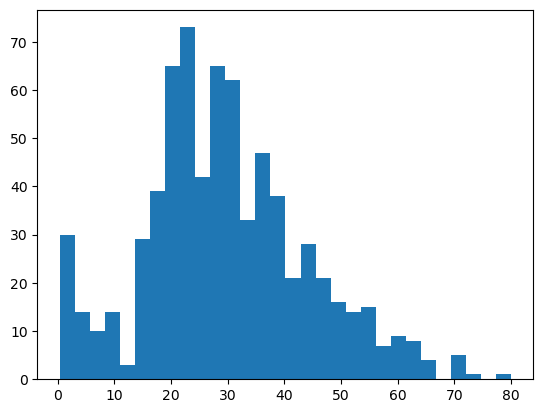

In [7]:
fig, ax = plt.subplots()
plt.hist(train['Age'], bins=30)
plt.show()

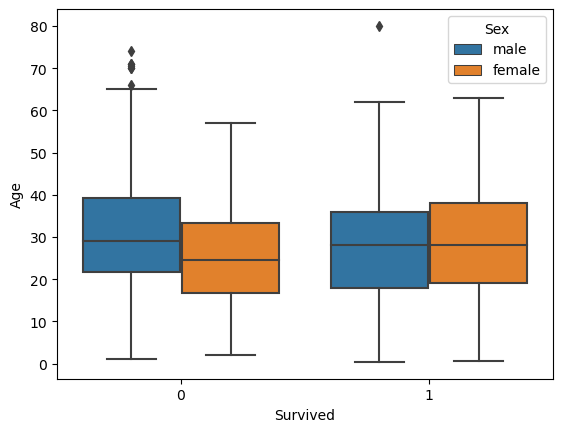

In [8]:
fig, ax = plt.subplots()
sns.boxplot(y=train['Age'], x=train['Survived'], hue=train['Sex'])
plt.show()

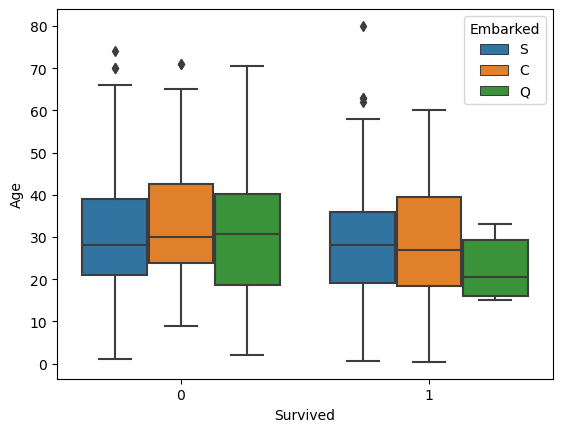

In [9]:
fig, ax = plt.subplots()
sns.boxplot(y=train['Age'], x=train['Survived'], hue=train['Embarked'])
plt.show()

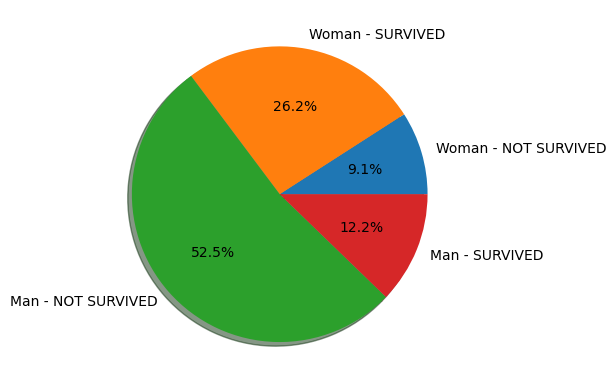

In [10]:
values = [len(train[(train['Sex'] == 'female') & (train['Survived'] == 0)]), 
          len(train[(train['Sex'] == 'female') & (train['Survived'] == 1)]),
          len(train[(train['Sex'] == 'male') & (train['Survived'] == 0)]),
          len(train[(train['Sex'] == 'male') & (train['Survived'] == 1)])]
labels = ['Woman - NOT SURVIVED', 'Woman - SURVIVED', 'Man - NOT SURVIVED', 'Man - SURVIVED']

fig, ax = plt.subplots()
plt.pie(labels=labels, x=values, shadow=True, autopct='%1.1f%%')
plt.show()

In [44]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  SibSp_and_Parch  baby  \
0         A/5 21171   7.2500   NaN         1                0     0   
1          PC 17599  71.2833   C85         2                0     0   
2  STON/O2. 3101282   7.9250   NaN         1                0     0   
3            113803  53.1000  C123         1                0     0   
4            373450   8.0500   NaN         1                0     0   

   man_in_2_class  man_in_3_class  woman_in_1_class  woman_in_2_class  
0               0               1                 0                 0  
1               0               0                 1                 0  
2               0               0                 0                 0  
3               0               0                 1                 0  
4               0               1                 0                 0

<h2>Modelagem</h2>

In [12]:
mean_age_man = train[train['Sex'] == 'male']['Age'].mean().round(0)
mean_age_woman = train[train['Sex'] == 'female']['Age'].mean().round(0)

In [13]:
condition_male = (train['Sex'] == 'male')
condition_female = (train['Sex'] == 'female')

train.loc[condition_male, 'Age'] = train.loc[condition_male, 'Age'].fillna(mean_age_man)
train.loc[condition_female, 'Age'] = train.loc[condition_female, 'Age'].fillna(mean_age_woman)

Decidi substituir os valores nulos pela média de idade de cada sexo

In [14]:
train['Sex'] = train['Sex'].map({'female':1, 'male':0})

Alterei os valores categóricos por valores númericos para o nosso modelo

In [15]:
train['Embarked'] = train['Embarked'].fillna(-1)
train['Embarked'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3, -1:-1})

In [16]:
train['SibSp_and_Parch'] = 0


condition_sibsp_and_parch = (train['SibSp'] > 0) & (train['Parch'] > 0)
train.loc[condition_sibsp_and_parch, 'SibSp_and_Parch'] = 1

Criei uma nova feature(SibSp_and_Parch), que basicamente tem valor 1 para pessoas que está no navio com pais/filhos e irmaos/esposas

In [17]:
train[train['Age'] <=8]['Survived'].value_counts()

1    36
0    18
Name: Survived, dtype: int64

In [18]:
train['baby'] = 0


condition_baby = (train['Age'] <= 8)
train.loc[condition_baby, 'baby'] = 1

Criei uma nova feature para crianças com menos de 8 anos

In [19]:
train[train['Age']>= 49]['Survived'].value_counts()

0    49
1    31
Name: Survived, dtype: int64

In [20]:
train['old'] = 0


condition_old = (train['Age'] >= 49)
train.loc[condition_old, 'old'] = 1

In [21]:
train.drop('old', axis=1, inplace=True)

Criei outra feature para idosos, porém removi, pois a correlacao é quase 0

In [40]:
print('Homens')
print('Classe 1: \n',train[(train['Pclass'] == 1) & (train['Sex'] == 0)]['Survived'].value_counts())
print('Classe 2: \n',train[(train['Pclass'] == 2) & (train['Sex'] == 0)]['Survived'].value_counts())
print('Classe 3: \n',train[(train['Pclass'] == 3) & (train['Sex'] == 0)]['Survived'].value_counts())
print()
print('Mulheres')
print('Classe 1: \n',train[(train['Pclass'] == 1) & (train['Sex'] == 1)]['Survived'].value_counts())
print('Classe 2: \n',train[(train['Pclass'] == 2) & (train['Sex'] == 1)]['Survived'].value_counts())
print('Classe 3: \n',train[(train['Pclass'] == 3) & (train['Sex'] == 1)]['Survived'].value_counts())

Homens
Classe 1: 
 0    77
1    45
Name: Survived, dtype: int64
Classe 2: 
 0    91
1    17
Name: Survived, dtype: int64
Classe 3: 
 0    300
1     47
Name: Survived, dtype: int64

Mulheres
Classe 1: 
 1    91
0     3
Name: Survived, dtype: int64
Classe 2: 
 1    70
0     6
Name: Survived, dtype: int64
Classe 3: 
 1    72
0    72
Name: Survived, dtype: int64


Opa, parece que homens da classe 3 tem um alto índice de morte, enquanto mulheres da primeira e segunda classe tem um alto índice de sobrevivencia. Vamos criar mais features com esses padrões localizados.


In [41]:
train['man_in_2_class'] = 0
train['man_in_3_class'] = 0

train['woman_in_1_class'] = 0
train['woman_in_2_class'] = 0

condition_man_in_2_class = (train['Pclass'] == 2) & (train['Sex'] == 0)
condition_man_in_3_class = (train['Pclass'] == 3) & (train['Sex'] == 0)

condition_woman_in_1_class = (train['Pclass'] == 1) & (train['Sex'] == 1)
condition_woman_in_2_class = (train['Pclass'] == 2) & (train['Sex'] == 1)

train.loc[condition_man_in_2_class, 'man_in_2_class'] = 1
train.loc[condition_man_in_3_class, 'man_in_3_class'] = 1

train.loc[condition_woman_in_1_class, 'woman_in_1_class'] = 1
train.loc[condition_woman_in_2_class, 'woman_in_2_class'] = 1

Criei novas features para essas descobertas. (man_in_2_class, man_in_3_class, woman_in_1_class, woman_in_2_class)

In [47]:
train['Embarked'].value_counts()

 1    644
 2    168
 3     77
-1      2
Name: Embarked, dtype: int64

In [46]:
print('Homens')
print('Embarque 1: \n',train[(train['Embarked'] == 1) & (train['Sex'] == 0)]['Survived'].value_counts())
print('Embarque 2: \n',train[(train['Embarked'] == 2) & (train['Sex'] == 0)]['Survived'].value_counts())
print('Embarque 3: \n',train[(train['Embarked'] == 3) & (train['Sex'] == 0)]['Survived'].value_counts())
print()
print('Mulheres')
print('Embarque 1: \n',train[(train['Embarked'] == 1) & (train['Sex'] == 1)]['Survived'].value_counts())
print('Embarque 2: \n',train[(train['Embarked'] == 2) & (train['Sex'] == 1)]['Survived'].value_counts())
print('Embarque 3: \n',train[(train['Embarked'] == 3) & (train['Sex'] == 1)]['Survived'].value_counts())

Homens
Embarque 1: 
 0    364
1     77
Name: Survived, dtype: int64
Embarque 2: 
 0    66
1    29
Name: Survived, dtype: int64
Embarque 3: 
 0    38
1     3
Name: Survived, dtype: int64

Mulheres
Embarque 1: 
 1    140
0     63
Name: Survived, dtype: int64
Embarque 2: 
 1    64
0     9
Name: Survived, dtype: int64
Embarque 3: 
 1    27
0     9
Name: Survived, dtype: int64


Outro padrão bastante interessante: Homens que embarcaram no primeiro porto, tem um alto índice de morte. Enquanto mulheres, não.

In [48]:
train['man_in_1_boarding'] = 0
train['man_in_3_boarding'] = 0

train['woman_in_1_boarding'] = 0
train['woman_in_2_boarding'] = 0
train['woman_in_3_boarding'] = 0

condition_man_in_1_boarding = (train['Embarked'] == 1) & (train['Sex'] == 0)
condition_man_in_3_boarding = (train['Embarked'] == 3) & (train['Sex'] == 0)

condition_woman_in_1_boarding = (train['Embarked'] == 1) & (train['Sex'] == 1)
condition_woman_in_2_boarding = (train['Embarked'] == 2) & (train['Sex'] == 1)
condition_woman_in_3_boarding = (train['Embarked'] == 3) & (train['Sex'] == 1)

train.loc[condition_man_in_1_boarding, 'man_in_1_boarding'] = 1
train.loc[condition_man_in_3_boarding, 'man_in_3_boarding'] = 1

train.loc[condition_woman_in_1_boarding, 'woman_in_1_boarding'] = 1
train.loc[condition_woman_in_2_boarding, 'woman_in_2_boarding'] = 1
train.loc[condition_woman_in_3_boarding, 'woman_in_3_boarding'] = 1

Novas features criadas com esses padrões bastante interessantes! =D

In [49]:
train.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name  Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    0  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                              Heikkinen, Miss. Laina    1  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                            Allen, Mr. William Henry    0  35.0      0   
5                                    Moran, Mr. James    0  31.0      0   
6                             McCarthy, Mr. Timothy J    0  54.0      0   
7                      Palsson, Master. Gosta Leonard    0   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)    1  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                           Bonnell, Miss. Elizabeth    1  58.0      0   
12                     Saundercock, Mr. William Henry    0  20.0      0   
13                        Andersson, Mr. Anders Johan    0  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina    1  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)     1  55.0      0   
16                               Rice, Master. Eugene    0   2.0      4   
17                       Williams, Mr. Charles Eugene    0  31.0      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...    1  31.0      1   
19                            Masselmani, Mrs. Fatima    1  28.0      0   

    Parch            Ticket     Fare  ... baby  man_in_2_class  \
0       0         A/5 21171   7.2500  ...    0               0   
1       0          PC 17599  71.2833  ...    0               0   
2       0  STON/O2. 3101282   7.9250  ...    0               0   
3       0            113803  53.1000  ...    0               0   
4       0            373450   8.0500  ...    0               0   
5       0            330877   8.4583  ...    0               0   
6       0             17463  51.8625  ...    0               0   
7       1            349909  21.0750  ...    1               0   
8       2            347742  11.1333  ...    0               0   
9       0            237736  30.0708  ...    0               0   
10      1           PP 9549  16.7000  ...    1               0   
11      0            113783  26.5500  ...    0               0   
12      0         A/5. 2151   8.0500  ...    0               0   
13      5            347082  31.2750  ...    0               0   
14      0            350406   7.8542  ...    0               0   
15      0            248706  16.0000  ...    0               0   
16      1            382652  29.1250  ...    1               0   
17      0            244373  13.0000  ...    0               1   
18      0            345763  18.0000  ...    0               0   
19      0              2649   7.2250  ...    0               0   

    man_in_3_class  woman_in_1_class  woman_in_2_class  man_in_1_boarding  \
0                1                 0                 0                  1   
1                0                 1                 0                  0   
2                0              

In [24]:
print("Irmãos/Conjuge a bordo: \n",train['SibSp'].value_counts())
print("Pais/Filhos a bordo: \n",train['Parch'].value_counts())


Irmãos/Conjuge a bordo: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Pais/Filhos a bordo: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [52]:
train.corr()["Survived"].sort_values(ascending=False)

C:\Users\Gui\AppData\Local\Temp\ipykernel_10064\254773384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()["Survived"].sort_values(ascending=False)


Survived               1.000000
Sex                    0.543351
woman_in_1_class       0.412581
woman_in_1_boarding    0.341581
woman_in_2_class       0.337329
woman_in_2_boarding    0.302760
Fare                   0.257307
woman_in_3_boarding    0.154497
baby                   0.147719
Embarked               0.096412
Parch                  0.081629
SibSp_and_Parch        0.047257
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.081736
man_in_3_boarding     -0.140300
man_in_2_class        -0.172920
Pclass                -0.338481
man_in_3_class        -0.407925
man_in_1_boarding     -0.425918
Name: Survived, dtype: float64